# McKinney Chapter 5 - Practice (Section 4, Wednesday 11:45 AM)

## Announcements

- Due on Friday 2/3 at 11:59 PM
    - 10,000 Total XP, but ***submit a PDF of your home page with total XP to Gradescope***
    - quiz 2 
- I will open project groups at 9 AM on Monday 2/6
- I will close project groups at 9 AM on Monday 2/13 and randomly assign unassigned students

## Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import yfinance as yf
import requests_cache

In [2]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format
session = requests_cache.CachedSession()

In [3]:
tickers = yf.Tickers('AAPL IBM MSFT GOOG', session=session)
prices = tickers.history(period='max', auto_adjust=False, progress=False)
prices.index = prices.index.tz_localize(None)
returns = prices['Adj Close'].pct_change().dropna()
returns

,AAPL,GOOG,IBM,MSFT
Date,,,,
2004-08-20,0.0029,0.0794,0.0042,0.0029
2004-08-23,0.0091,0.0101,-0.0070,0.0044
2004-08-24,0.0280,-0.0414,0.0007,0.0000
2004-08-25,0.0344,0.0108,0.0042,0.0114
2004-08-26,0.0487,0.0180,-0.0045,-0.0040
...,...,...,...,...
2023-02-15,0.0139,0.0226,0.0029,-0.0080
2023-02-16,-0.0104,-0.0136,-0.0103,-0.0266
2023-02-17,-0.0075,-0.0124,0.0001,-0.0156


### What are the mean daily returns for these four stocks?

In [4]:
returns.mean()

AAPL   0.0015
GOOG   0.0010
IBM    0.0003
MSFT   0.0007
dtype: float64

### What are the standard deviations of daily returns for these four stocks?

In [5]:
returns.std()

AAPL   0.0210
GOOG   0.0195
IBM    0.0144
MSFT   0.0173
dtype: float64

### What are the *annualized* means and standard deviations of daily returns for these four stocks?

In [6]:
returns.mean().mul(252)

AAPL   0.3674
GOOG   0.2423
IBM    0.0809
MSFT   0.1831
dtype: float64

In [7]:
returns.std().mul(np.sqrt(252))

AAPL   0.3329
GOOG   0.3088
IBM    0.2292
MSFT   0.2742
dtype: float64

***The best explanation I have found on why stock return volatility (the standard deviation of stocks returns) grows with the square root of time is at the bottom of page 7 of [chapter 8 of Ivo Welch's free corporate finance textbook](https://book.ivo-welch.info/read/source5.mba/08-invchoice.pdf).***

### Plot *annualized* means versus standard deviations of daily returns for these four stocks

Use `plt.scatter()`, which expects arguments as `x` (standard deviations) then `y` (means).

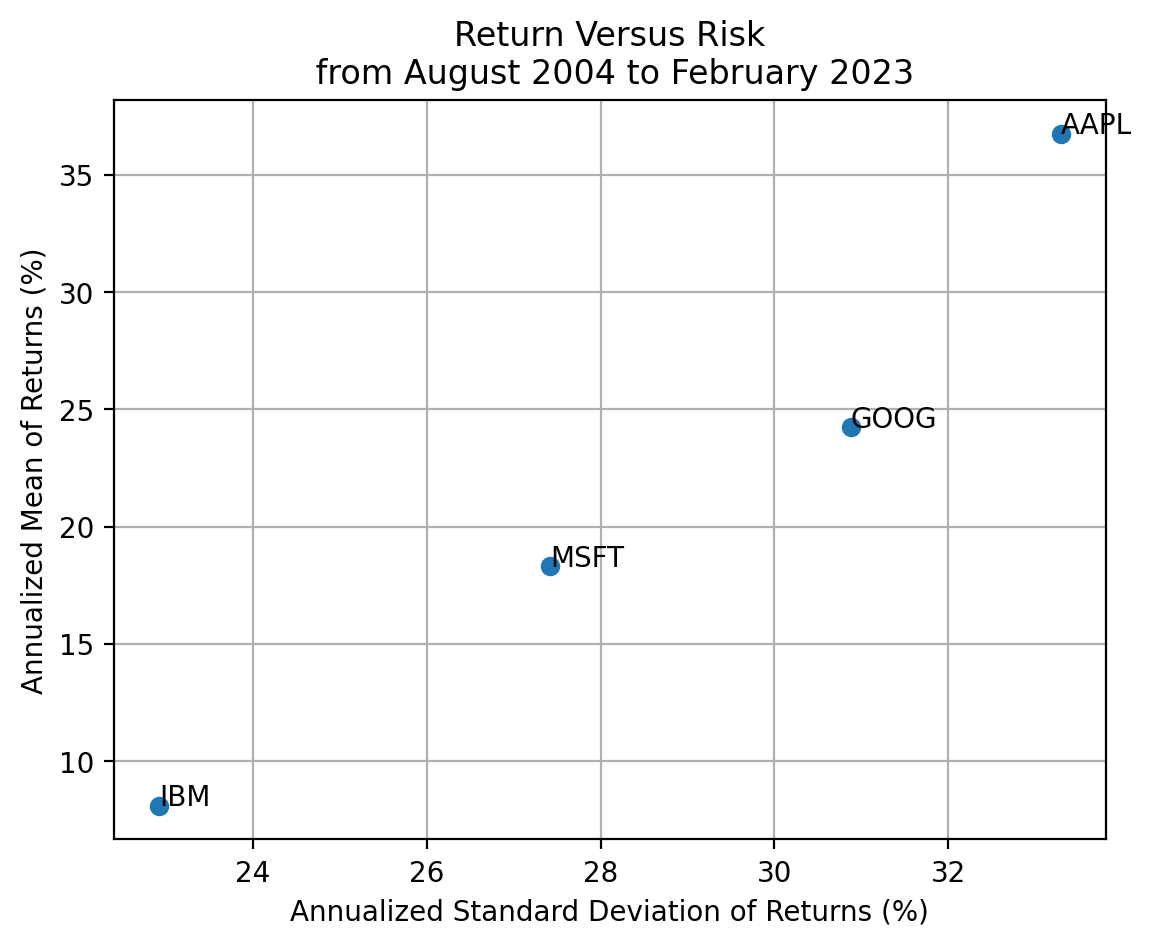

In [8]:
plt.scatter(
    returns.std().mul(np.sqrt(252)).mul(100),
    returns.mean().mul(252).mul(100)
)
plt.xlabel('Annualized Standard Deviation of Returns (%)')
plt.ylabel('Annualized Mean of Returns (%)')
plt.title(f'Return Versus Risk\n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')
plt.grid()

for i in returns:
    plt.text(
        x=returns[i].std() * np.sqrt(252) * 100,
        y=returns[i].mean() * 252 * 100,
        s=i
    )

plt.show()

### Repeat the previous calculations and plot for the stocks in the Dow-Jones Industrial Index (DJIA)

We can find the current DJIA stocks on [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).
We will need to download new data, into `tickers2`, `prices2`, and `returns2`.

In [9]:
wiki = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')

In [10]:
symbols = wiki[1]['Symbol']

In [11]:
tickers_2 = yf.Tickers(tickers=symbols.to_list(), session=session)
prices_2 = tickers_2.history(period='max', auto_adjust=False, progress=False)
prices_2.index = prices_2.index.tz_localize(None)
returns_2 = prices_2['Adj Close'].pct_change().dropna()
returns_2.columns.name = 'Ticker'

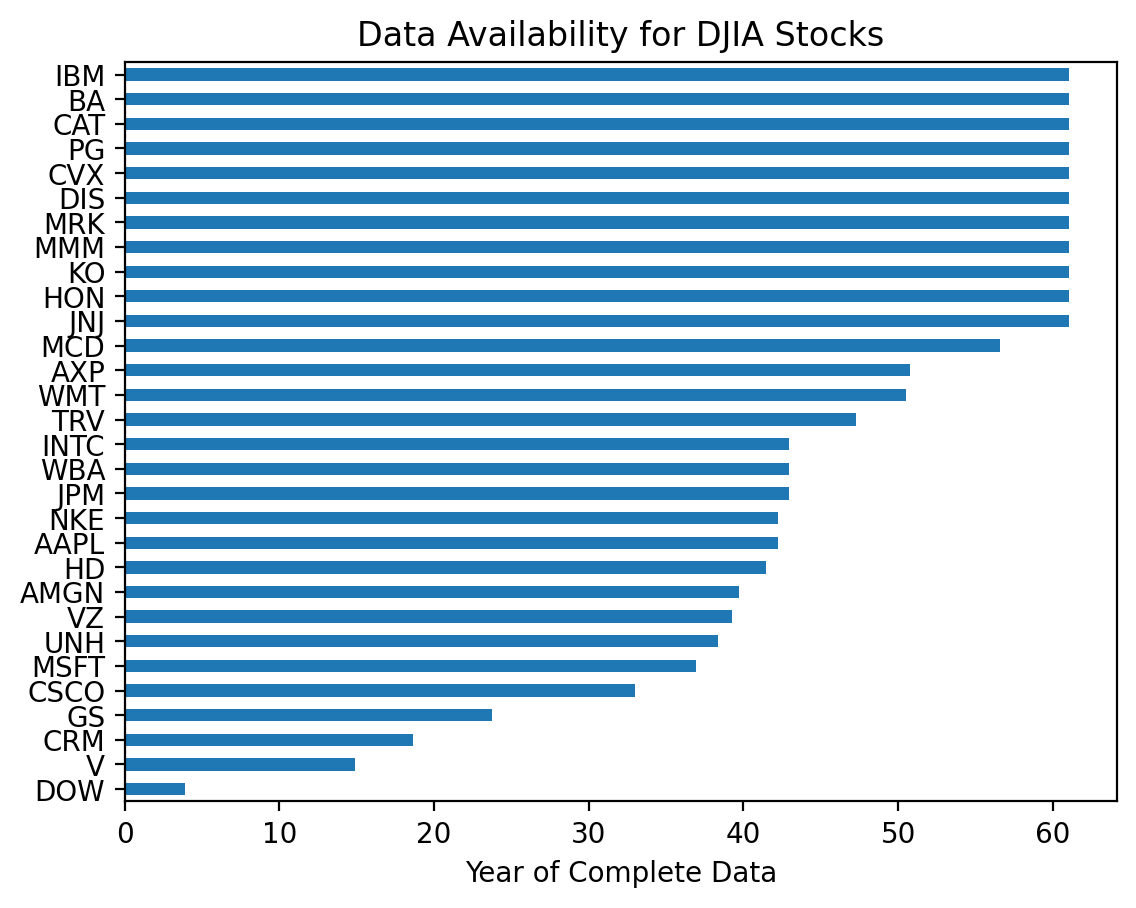

In [12]:
(
    prices_2['Adj Close']
    .count()
    .div(252)
    .sort_values()
    .plot(kind='barh')
)
plt.xlabel('Year of Complete Data')
plt.title('Data Availability for DJIA Stocks')
plt.show()

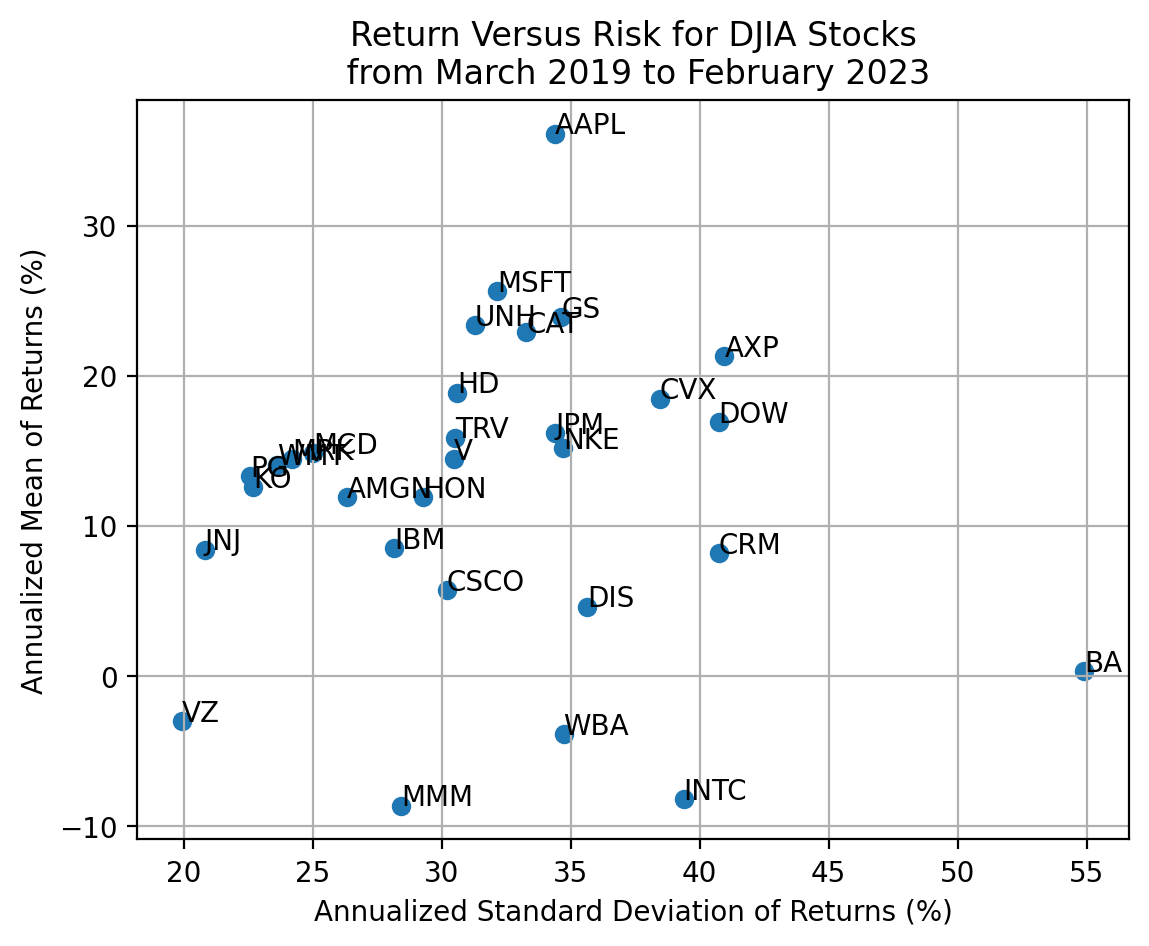

In [13]:
plt.scatter(
    returns_2.std().mul(np.sqrt(252)).mul(100),
    returns_2.mean().mul(252).mul(100)
)
plt.xlabel('Annualized Standard Deviation of Returns (%)')
plt.ylabel('Annualized Mean of Returns (%)')
plt.title(f'Return Versus Risk for DJIA Stocks\n from {returns_2.index[0]:%B %Y} to {returns_2.index[-1]:%B %Y}')
plt.grid()

for i in returns_2:
    plt.text(
        x=returns_2[i].std() * np.sqrt(252) * 100,
        y=returns_2[i].mean() * 252 * 100,
        s=i
    )


***THERE IS NO RELATION BETWEEN RETURNS AND RISK FOR SINGLE STOCKS!***

In [14]:
np.corrcoef(returns_2.mean(), returns_2.std())

array([[ 1.    , -0.0028],
       [-0.0028,  1.    ]])

### Calculate total returns for the stocks in the DJIA

We can use the `.prod()` method to compound returns as $1 + R_T = \prod_{t=1}^T (1 + R_t)$.
Technically, we should write $R_T$ as $R_{0,T}$, but we typically omit the subscript $0$.

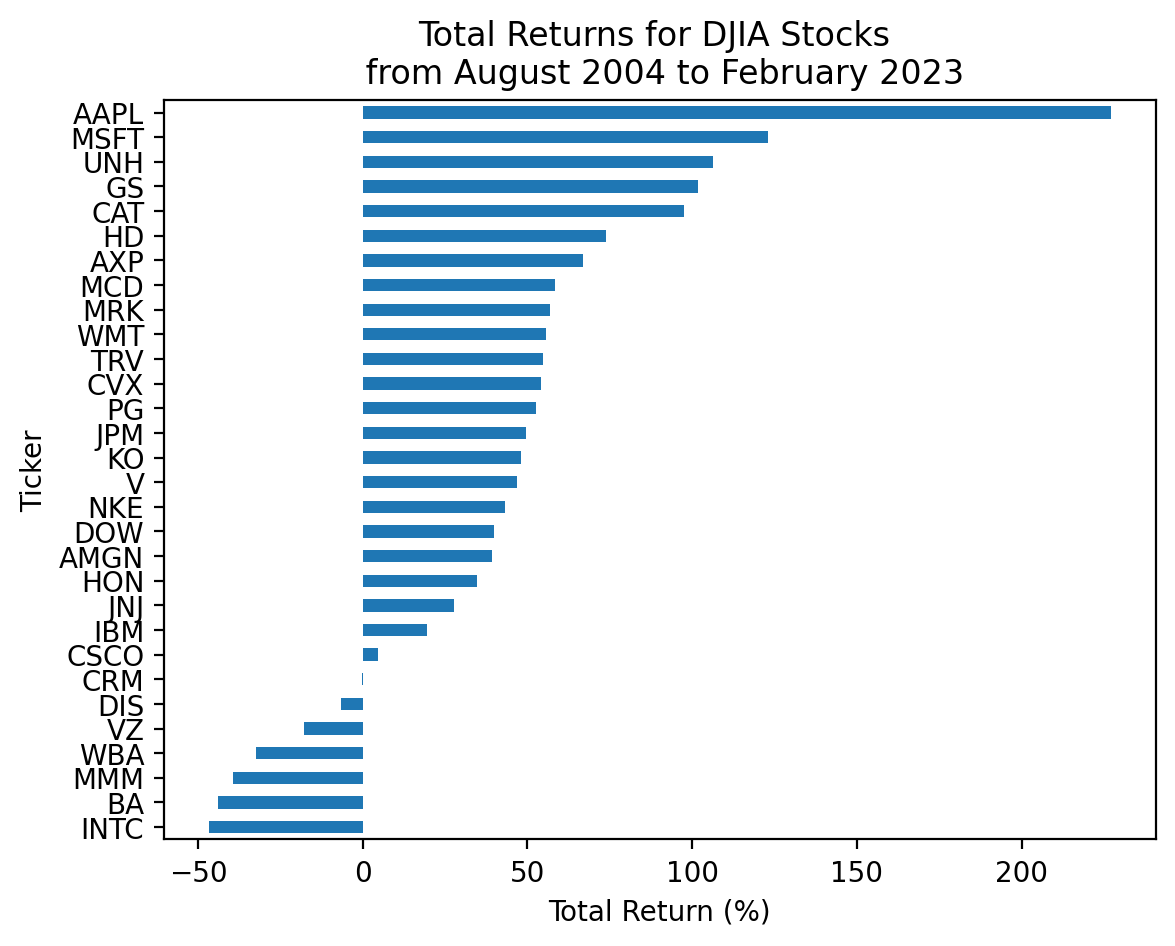

In [15]:
(
    returns_2
    .add(1)
    .prod()
    .sub(1)
    .mul(100)
    .sort_values()
    .plot(kind='barh')
)
plt.xlabel('Total Return (%)')
plt.title(f'Total Returns for DJIA Stocks \n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')
plt.show()

### Plot the distribution of total returns for the stocks in the DJIA

We can plot a histogram, using either the `plt.hist()` function or the `.plot(kind='hist')` method.

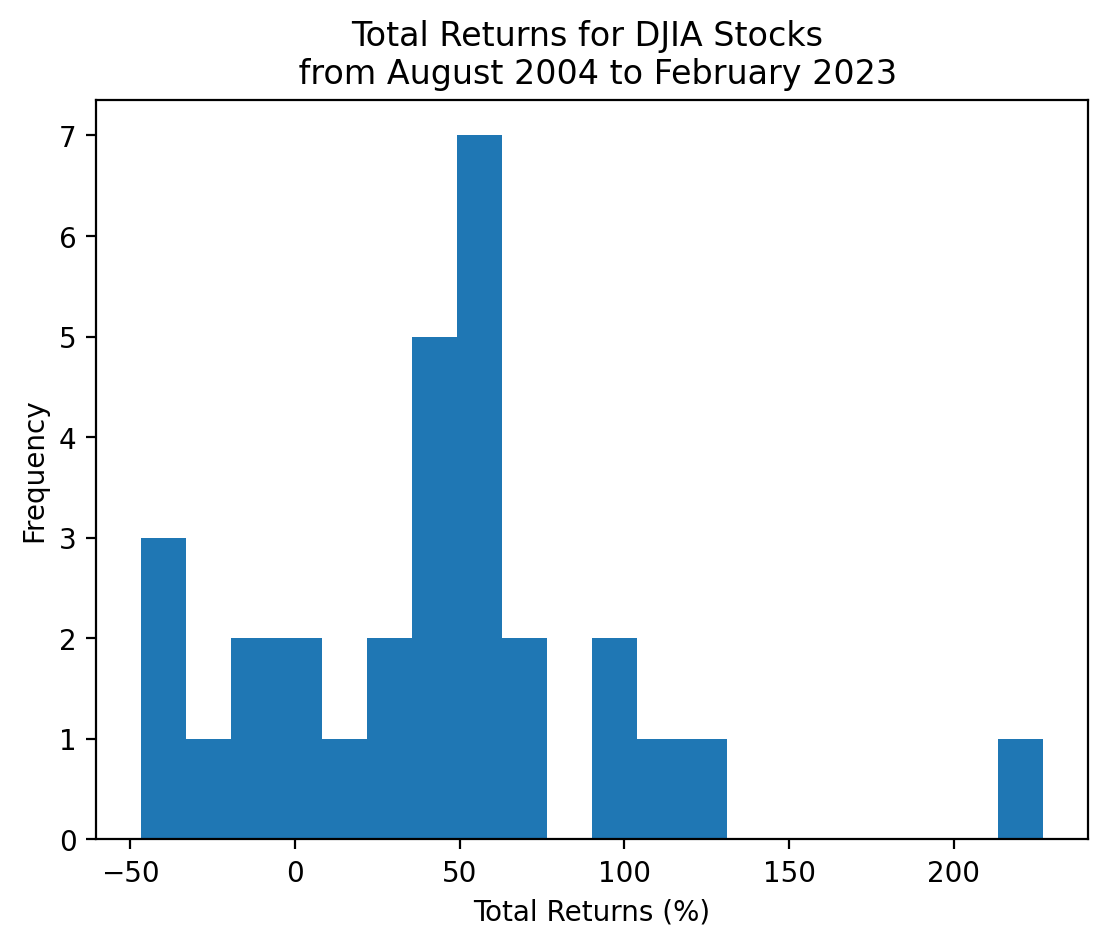

In [16]:
(
    returns_2
    .add(1)
    .prod()
    .sub(1)
    .mul(100)
    .plot(kind='hist', bins=20)
)
plt.xlabel('Total Returns (%)')
plt.title(f'Total Returns for DJIA Stocks \n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')
plt.show()

### Which stocks have the minimum and maximum total returns?

In [17]:
returns_2_total = returns_2.add(1).prod().sub(1)

In [18]:
returns_2_total.idxmin()

'INTC'

In [19]:
returns_2_total.idxmax()

'AAPL'

In [20]:
returns_2_total.nsmallest()

Ticker
INTC   -0.4667
BA     -0.4399
MMM    -0.3931
WBA    -0.3230
VZ     -0.1787
dtype: float64

In [21]:
returns_2_total.nlargest()

Ticker
AAPL   2.2708
MSFT   1.2300
UNH    1.0640
GS     1.0192
CAT    0.9764
dtype: float64

In [22]:
returns_2_total.sort_values().iloc[[0, -1]]

Ticker
INTC   -0.4667
AAPL    2.2708
dtype: float64

### Plot the cumulative returns for the stocks in the DJIA

We can use the cumulative product method `.cumprod()` to calculate the right hand side of the formula above.

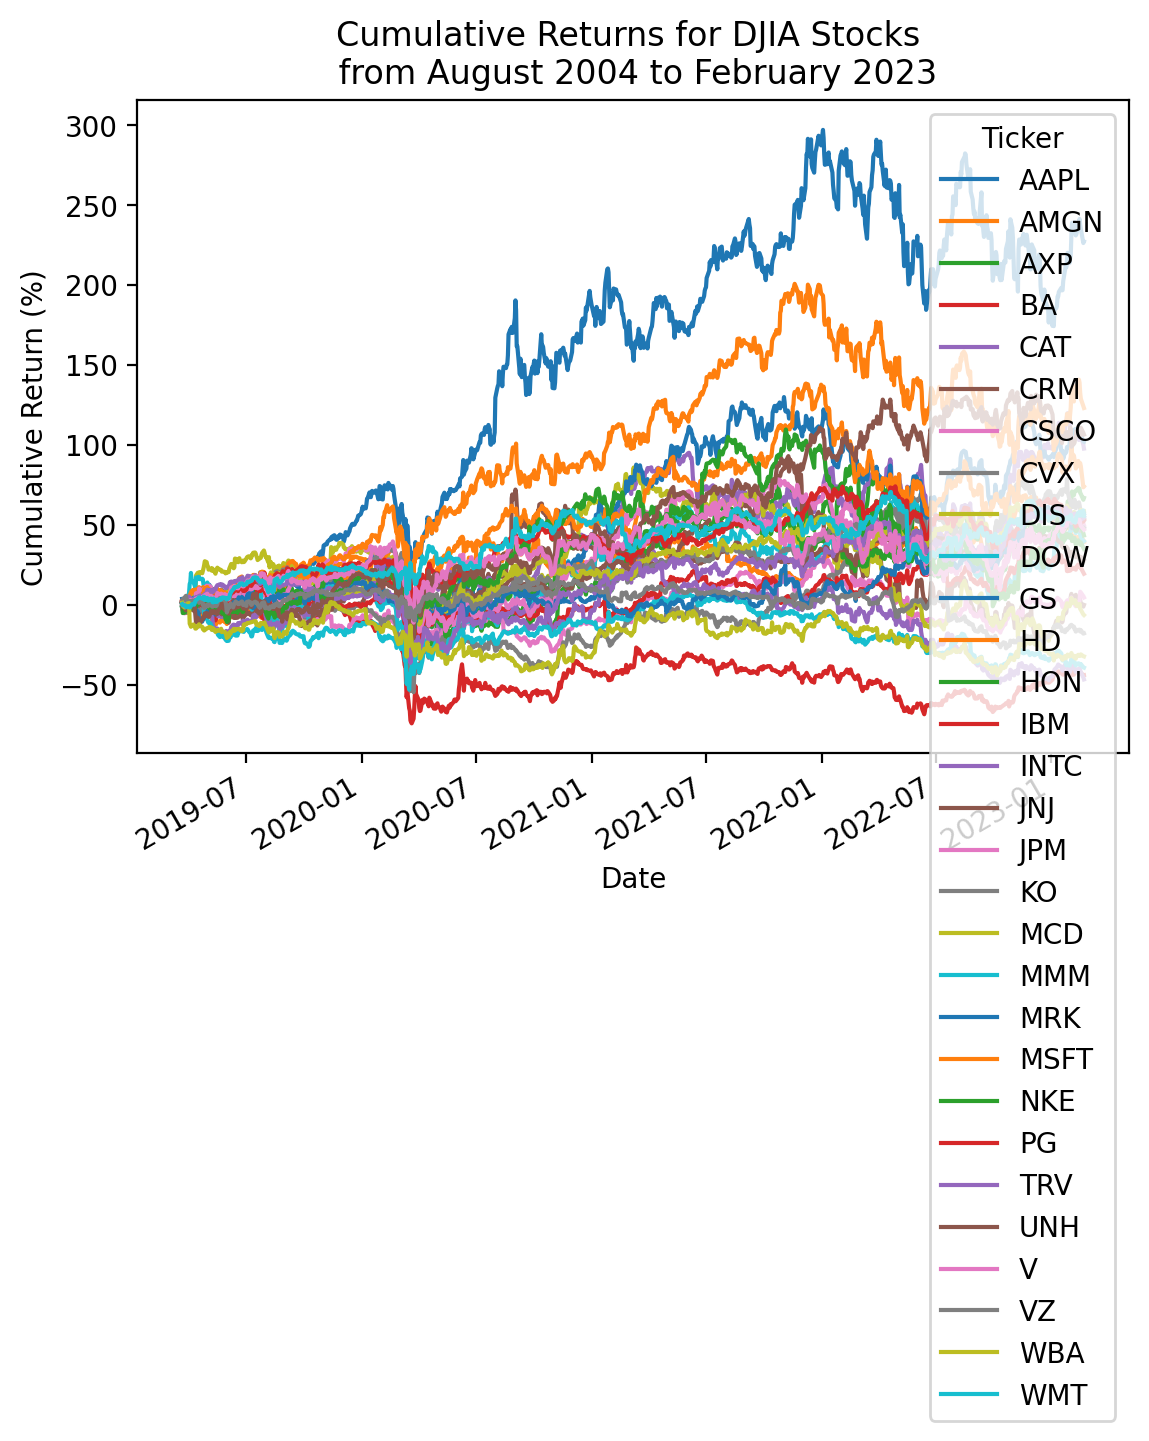

In [23]:
(
    returns_2
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot()
)
plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns for DJIA Stocks \n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')
plt.show()

### Repeat the plot above with only the minimum and maximum total returns

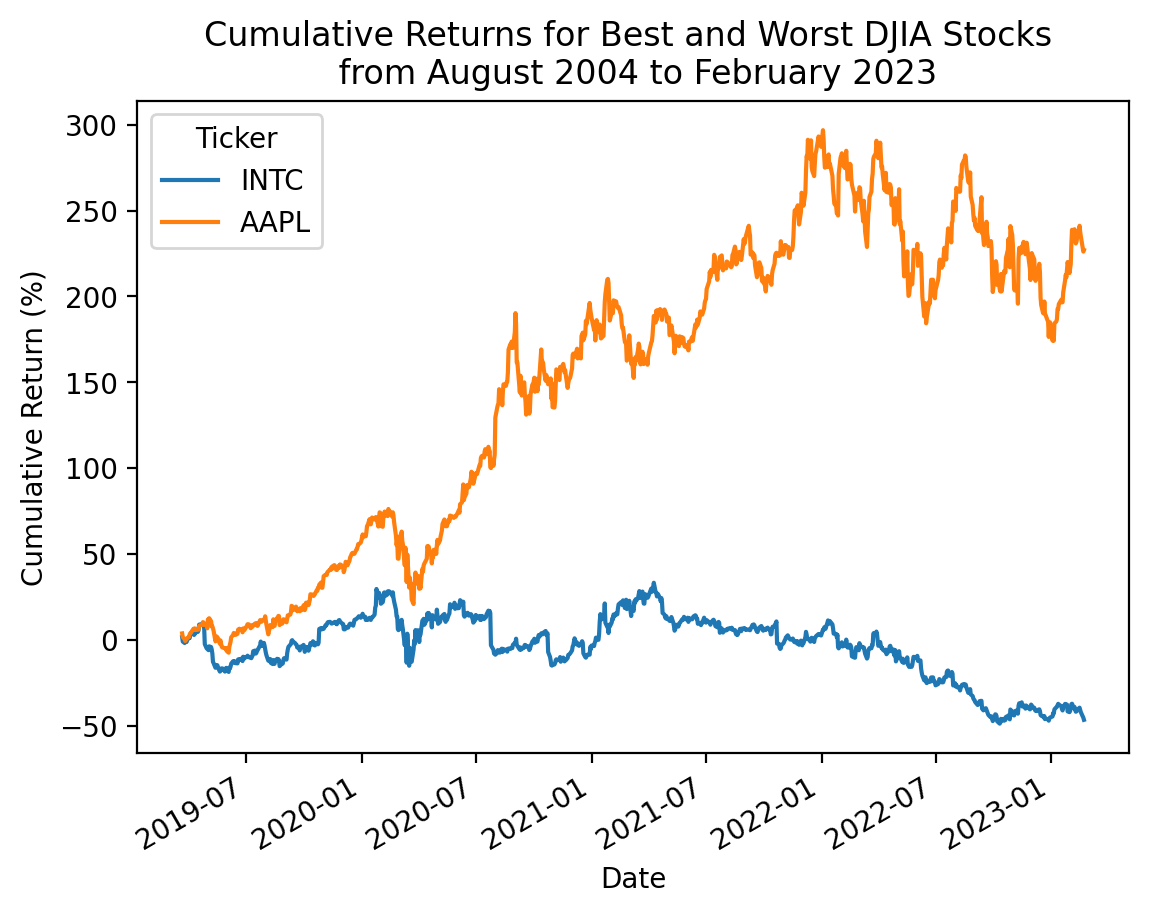

In [24]:
(
    returns_2[ # DJIA daily returns
        returns_2_total.sort_values()[[0, -1]].index # slice min and mix total returns
    ]
    .add(1) # add 1
    .cumprod() # calculate cumulative returns
    .sub(1) # sutract 1
    .mul(100) # convert to percent
    .plot() # plot the time series
)
plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns for Best and Worst DJIA Stocks \n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')
plt.show()